#  **Task 1** - Data Quality Assesment

## Introduction

> Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team. 
However, in order to support the analysis, you speak to the Associate Director for some ideas and she advised that “the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”

The client provided KPMG with 3 datasets:

 - Customer Demographic 
 - Customer Addresses
 - Transactions data in the past 3 months
 
You decide to start the preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.

In [1]:
#Importing the needed libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading all the three files provided in the pandas data frame

Cust_demographic= pd.read_excel('KPMG.xlsx',sheet_name='CustomerDemographic', header=1)
Cust_address= pd.read_excel('KPMG.xlsx',sheet_name='CustomerAddress', header=1)
Transaction= pd.read_excel('KPMG.xlsx',sheet_name='Transactions', header=1)

### Assesment of `Customer_demographic` dataset

In [3]:
Cust_demographic.shape

(4000, 13)

In [4]:
Cust_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [5]:
Cust_demographic.dtypes.value_counts()

object            9
int64             2
float64           1
datetime64[ns]    1
dtype: int64

In [6]:
Cust_demographic.describe(include=[np.number])

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [7]:
Cust_demographic.describe(include=[np.object])

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Timmie,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [8]:
Cust_demographic['DOB'].describe()

count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

In [9]:
Cust_demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

 - Removing the rows where `DOB` and `tenure` is null.
 - Filtering out non-realstic date of birth from `DOB` column.
 - Dropping `default` variable
 - `Gender` variable has multiple name for same observation, which needs to be uniform.
 - Few of the columns i.e. `job_title` , `job_title `, `last_name` have missing values 

In [10]:
Cust_demographic.dropna(axis=0,how='any',subset=['DOB'],inplace=True)

In [11]:
Cust_demographic.drop(columns=['default'],axis=1,inplace=True)

In [12]:
Cust_demographic= Cust_demographic[Cust_demographic['DOB']!='1843-12-21 00:00:00']


In [13]:
Cust_demographic['gender'].value_counts()

Female    2037
Male      1872
M            1
F            1
Femal        1
Name: gender, dtype: int64

In [14]:
Cust_demographic= Cust_demographic.replace(to_replace=['Femal','F'],value='Female')
Cust_demographic= Cust_demographic.replace(to_replace='M',value='Male')

In [15]:
Cust_demographic['gender'].value_counts()

Female    2039
Male      1873
Name: gender, dtype: int64

In [16]:
Cust_demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              121
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64

In [17]:
Cust_demographic['job_industry_category'].value_counts()

Manufacturing         796
Financial Services    767
Health                596
Retail                358
Property              267
IT                    151
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

### Assesment of `Customer_Addresses` dataset

In [18]:
Cust_address.shape

(3999, 6)

In [19]:
Cust_address.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [20]:
Cust_address.dtypes.value_counts()

object    3
int64     3
dtype: int64

In [21]:
Cust_address.describe(include=[np.number])

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [22]:
Cust_address.describe(include=[np.object])

,address,state,country
count,3999,3999,3999
unique,3996,5,1
top,3 Talisman Place,NSW,Australia
freq,2,2054,3999


In [23]:
Cust_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

### Assesment of `Transactional` Dataset

In [24]:
Transaction.shape

(20000, 13)

In [25]:
Transaction.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [26]:
Transaction.dtypes.value_counts()

object            5
float64           4
int64             3
datetime64[ns]    1
dtype: int64

In [27]:
Transaction.describe(include=[np.number])

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [28]:
Transaction.describe(include=[np.object])

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [29]:
Transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [30]:
Transaction.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [31]:
Transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [32]:
Transaction.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [33]:
# Removing the rows where there is no values updated for product
Transaction.dropna(axis=0,how='any',subset=['brand','product_line','product_class','product_size'],inplace=True)

In [34]:
Transaction.drop(columns=['online_order', 'order_status', 'brand', 'product_line','product_class', 'product_size', 'standard_cost',
       'product_first_sold_date'],axis=1)

,transaction_id,product_id,customer_id,transaction_date,list_price
0,1,2,2950,2017-02-25,71.49
1,2,3,3120,2017-05-21,2091.47
2,3,37,402,2017-10-16,1793.43
3,4,88,3135,2017-08-31,1198.46
4,5,78,787,2017-10-01,1765.30
...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,2005.66
19996,19997,41,127,2017-11-09,416.98
19997,19998,87,2284,2017-04-14,1636.90
19998,19999,6,2764,2017-07-03,227.88


In [35]:
New_Transaction= Transaction.groupby('customer_id')['list_price'].sum().reset_index(name='list_price')

In [36]:
New_Transaction.dtypes

customer_id      int64
list_price     float64
dtype: object

In [37]:
New_Transaction.head()

,customer_id,list_price
0,1,9084.45
1,2,4149.07
2,3,9888.23
3,4,1047.72
4,5,5903.20


- All the observation were removed where is no data updated for `brand`,`product_line`,`product_class` and `product_size`.
- The data type for `product_first_sold_date` is changed to date datatype
- The missing values for `online_order` was near about 1.5% hence removed  
- Non-essential columns like `transaction_i` and `product_id` is dropped

# Task 2-  Data Insight

## Introduction

>Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation. 
The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.

> For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour.
The client has agreed on a 3 week scope with the following 3 phases as follows
- Data Exploration;
- Model Development
- Interpretation

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 
Prepare a detailed approach for completing the analysis including activities - Understanding the data distributions feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 


We will first merge all the three dataset into one data set on the variable **customer_id** as it is the common variable in all the three datasets.

In [38]:
df= pd.merge(Cust_demographic,Cust_address,how='inner')

In [39]:
Final_dataset=pd.merge(df,New_Transaction,how='inner')

In [40]:
Final_dataset.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,list_price
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,9084.45
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,4149.07
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,1047.72
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4,5903.20
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,5931.69


In [41]:
Final_dataset.shape

(3412, 18)

In [42]:
Final_dataset.describe(include=[np.number])

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,list_price
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000
mean,1751.154748,48.971864,10.678488,2989.407972,7.517878,6267.383883
std,1009.235853,28.651595,5.673060,852.941310,2.821885,2945.699196
min,1.000000,0.000000,1.000000,2000.000000,1.000000,60.340000
25%,877.750000,24.000000,6.000000,2200.000000,6.000000,4149.430000
50%,1750.500000,48.000000,11.000000,2768.000000,8.000000,5979.365000
75%,2623.250000,73.000000,15.000000,3756.000000,10.000000,8094.372500
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,19071.320000


In [43]:
Final_dataset.describe(include=[np.object])

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,state,country
count,3412,3303,3412,2997,2852,3412,3412,3412,3412,3412,3412
unique,2777,3193,2,195,9,3,2,2,3410,5,1
top,Tobe,Ramsdell,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,Yes,3 Talisman Place,NSW,Australia
freq,5,3,1758,38,701,1702,3411,1723,2,1739,3412


There are some missing values in the variables which required more investigation

In [44]:
Final_dataset.dtypes.value_counts()

object            11
int64              4
float64            2
datetime64[ns]     1
dtype: int64

In [45]:
# Replacing the missing values for 'job_title' and 'job_industry_category' to others

Final_dataset= Final_dataset.replace(to_replace= np.nan,value='Others')

In [46]:
Final_dataset.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                        float64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
list_price                                    float64
dtype: object

In [47]:
# Converting the data type of the 'transaction date' and 'product_first_sold_date'
Final_dataset['DOB'] =pd.to_datetime(Final_dataset['DOB'],errors='coerce')

In [48]:
# Adding Age column to the dataframe
## Age at the time of transaction
Current_Date= pd.to_datetime('today')
Final_dataset['Age'] = Current_Date.year - Final_dataset['DOB'].dt.year

In [49]:
# Filling the missing values in Age with mean
mean_val= Final_dataset['Age'].mean()
Final_dataset['Age']=Final_dataset['Age'].fillna(mean_val)

In [50]:
Final_dataset.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,list_price,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,9084.45,67
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,4149.07,40
2,4,Talbot,Others,Male,33,1961-10-03,Others,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,1047.72,59
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Others,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4,5903.20,43
4,6,Curr,Duckhouse,Male,35,1966-09-16,Others,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,5931.69,54


In [51]:
# The dataset is now cleaned for the further assesment and modeling purpose
## Saving the dataset in the excel file
Final_dataset.to_excel('KPMG_Updated.xlsx')

In [52]:
Final_dataset.describe(include=[np.number])

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,list_price,Age
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000
mean,1751.154748,48.971864,10.678488,2989.407972,7.517878,6267.383883,42.824736
std,1009.235853,28.651595,5.673060,852.941310,2.821885,2945.699196,12.579541
min,1.000000,0.000000,1.000000,2000.000000,1.000000,60.340000,18.000000
25%,877.750000,24.000000,6.000000,2200.000000,6.000000,4149.430000,33.000000
50%,1750.500000,48.000000,11.000000,2768.000000,8.000000,5979.365000,43.000000
75%,2623.250000,73.000000,15.000000,3756.000000,10.000000,8094.372500,52.000000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,19071.320000,89.000000


In [53]:
categorical=['gender','job_industry_category','wealth_segment','owns_car','state']

In [54]:
# Visulaizing Categorical variables
#fig, ax= plt.subplots(4,2,figsize=(30,30))
#base_color=sns.color_palette()[0]
#for variable, subplot in zip(categorical, ax.flatten()):
    #sns.countplot(Final_dataset[variable], ax=subplot)
    #for label in subplot.get_xticklabels():
        #label.set_rotation(90)

In [55]:
Numerical=['past_3_years_bike_related_purchases','tenure','property_valuation','list_price','Age']

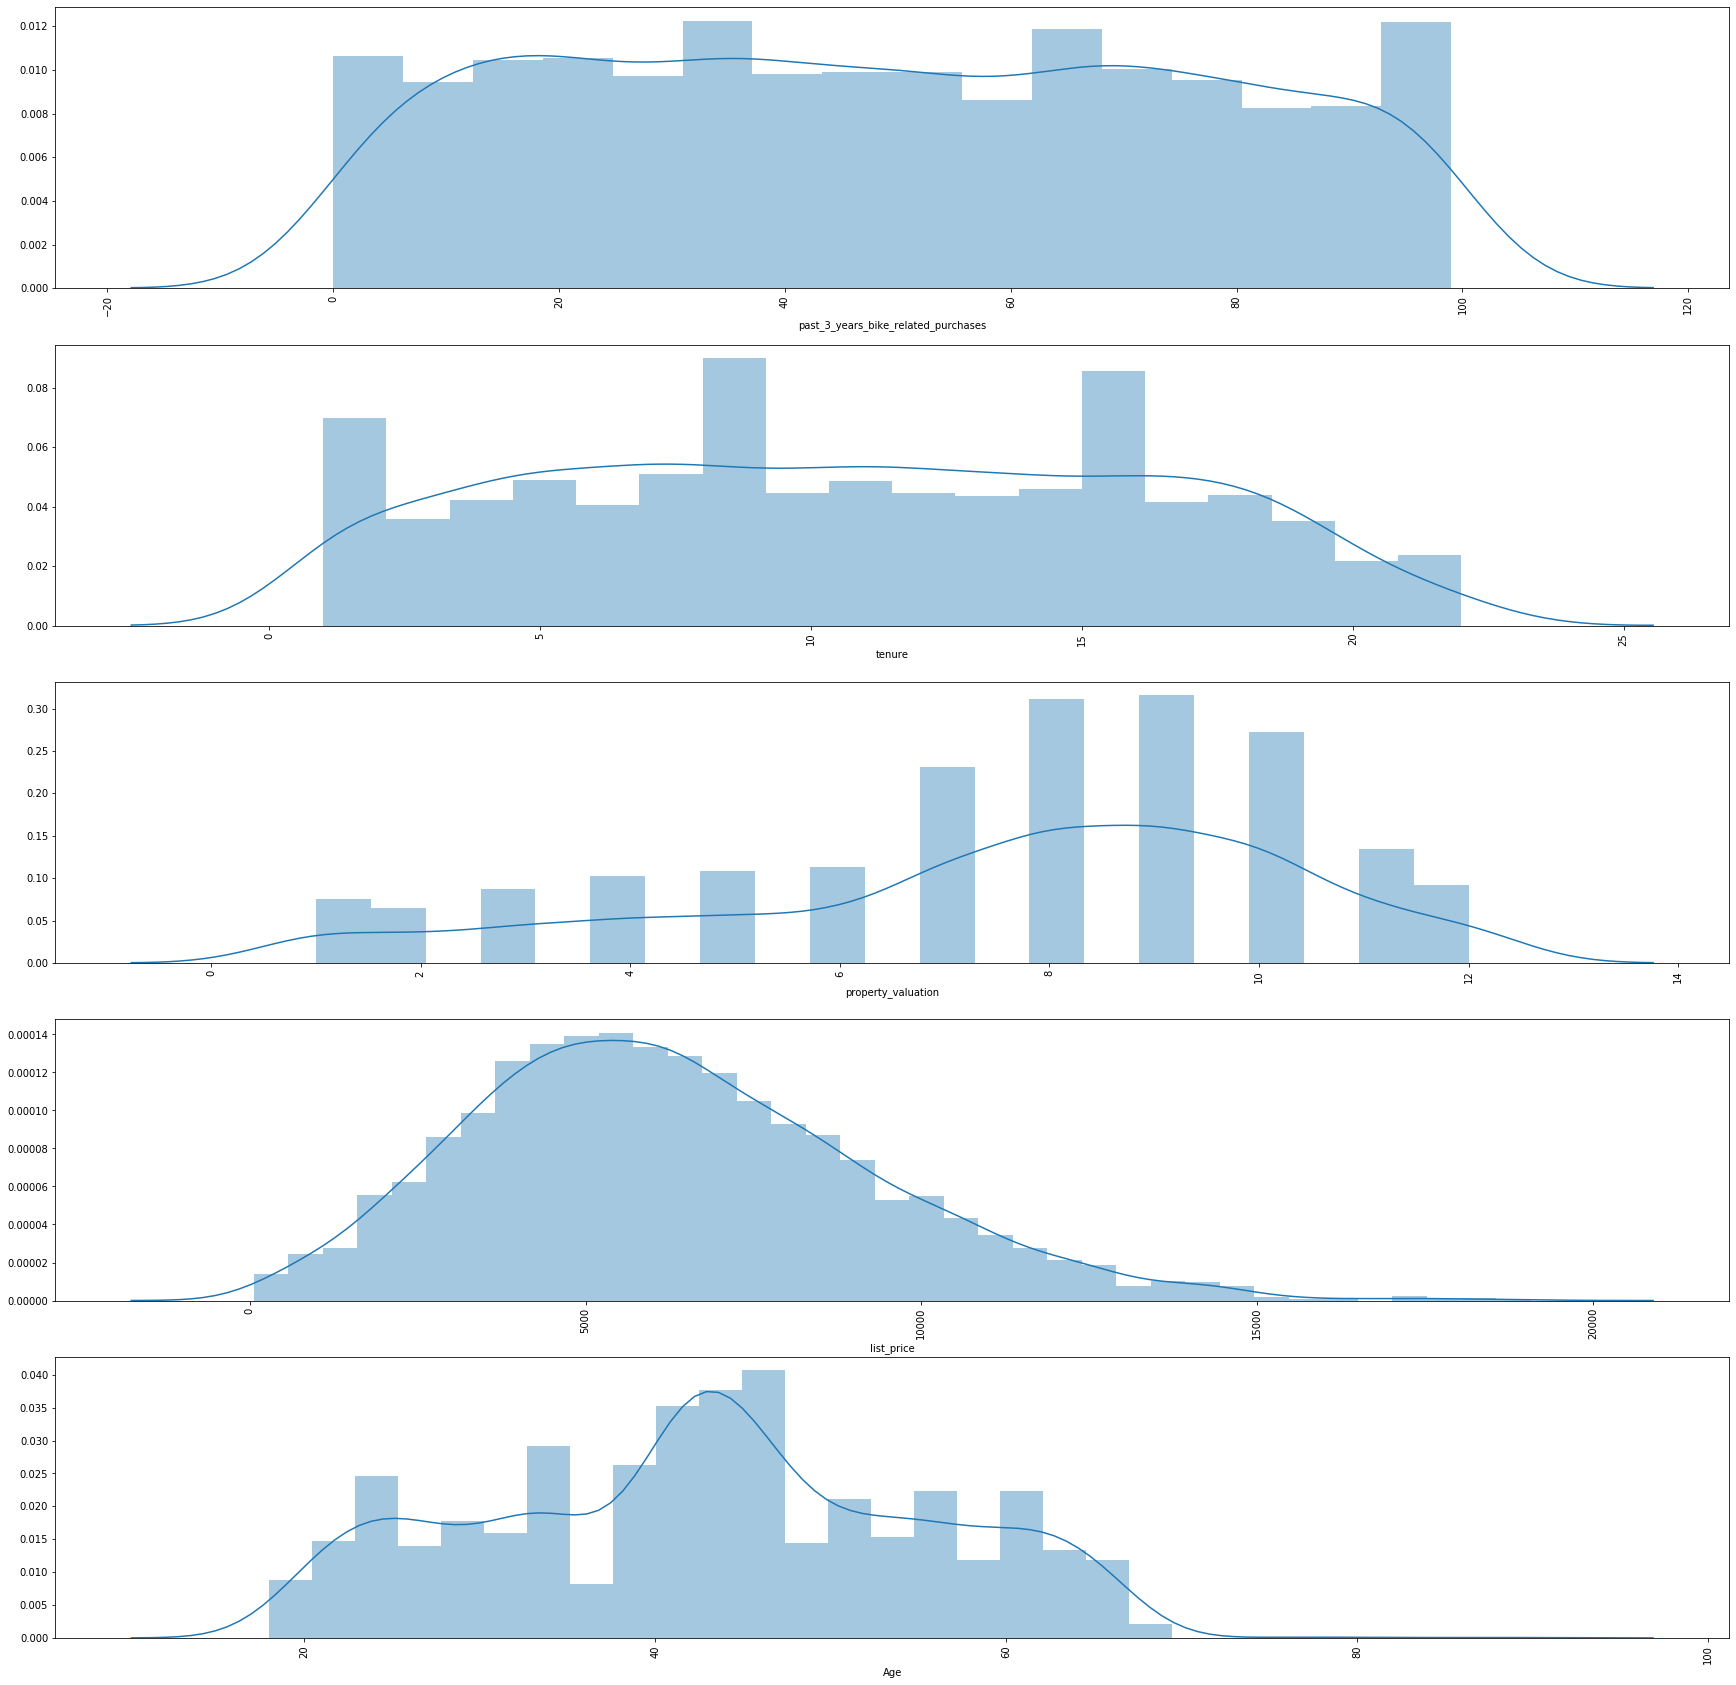

In [64]:
# Visulaizing Numerical variables
fig, ax= plt.subplots(5,1,figsize=(30,30))
base_color=sns.color_palette(palette="rocket")[3]
for variable, subplot in zip(Numerical, ax.flatten()):
    sns.distplot(Final_dataset[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [65]:
Final_dataset['Age'].describe()

count    3412.000000
mean       42.824736
std        12.579541
min        18.000000
25%        33.000000
50%        43.000000
75%        52.000000
max        89.000000
Name: Age, dtype: float64

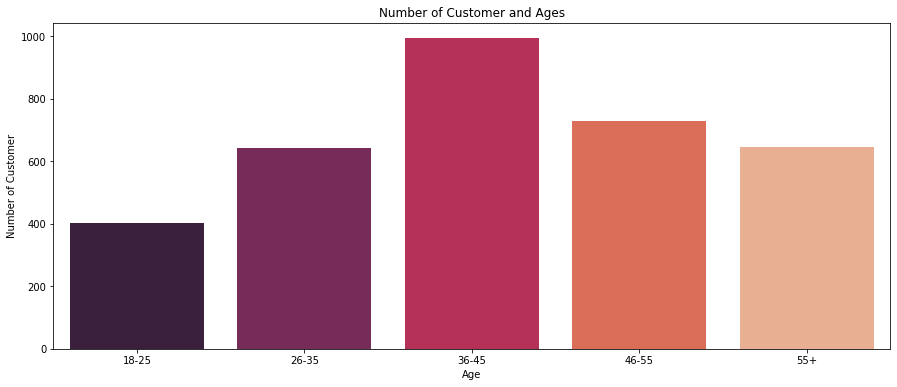

In [66]:
age18_25 = Final_dataset.Age[(Final_dataset.Age <= 25) & (Final_dataset.Age >= 18)]
age26_35 = Final_dataset.Age[(Final_dataset.Age <= 35) & (Final_dataset.Age >= 26)]
age36_45 = Final_dataset.Age[(Final_dataset.Age <= 45) & (Final_dataset.Age >= 36)]
age46_55 = Final_dataset.Age[(Final_dataset.Age <= 55) & (Final_dataset.Age >= 46)]
age55above = Final_dataset.Age[Final_dataset.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

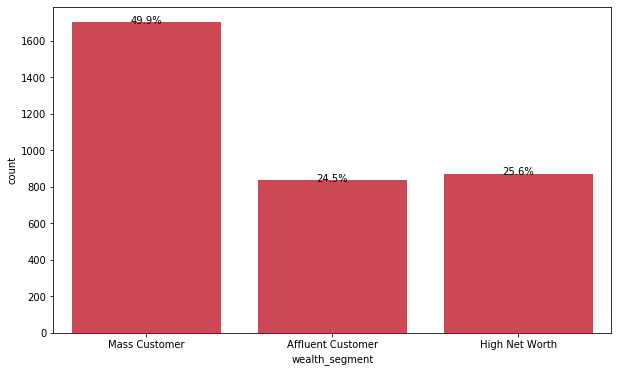

In [67]:
# create the plot
#base_color = sns.color_palette()[0]
base_color=sns.color_palette(palette="rocket")[3]
plt.figure(figsize=(10,6))
sns.countplot(data = Final_dataset, x = 'wealth_segment', color = base_color)

# add annotations
n_points = Final_dataset.shape[0]
cat_counts = Final_dataset['wealth_segment'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center')

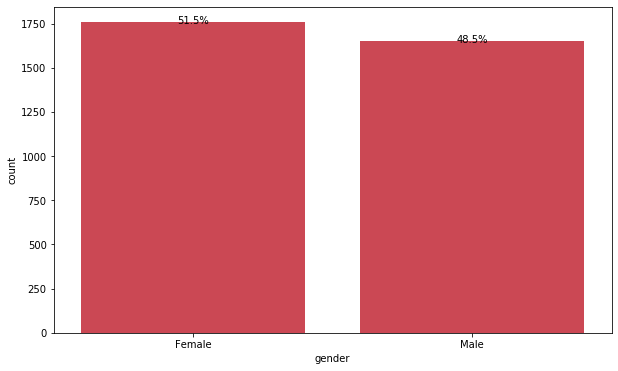

In [68]:
# create the plot
base_color=sns.color_palette(palette="rocket")[3]
plt.figure(figsize=(10,6))
sns.countplot(data = Final_dataset, x = 'gender', color = base_color)

# add annotations
n_points = Final_dataset.shape[0]
cat_counts = Final_dataset['gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center')

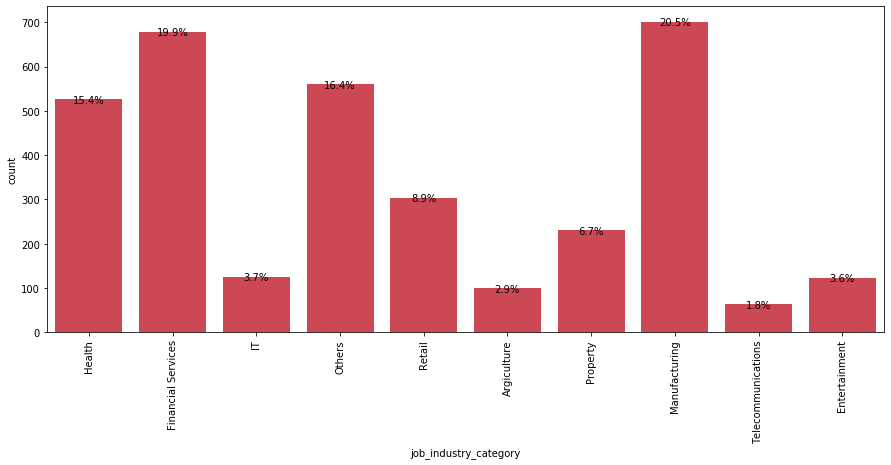

In [69]:
# create the plot
base_color=sns.color_palette(palette="rocket")[3]
plt.figure(figsize=(15,6))
sns.countplot(data = Final_dataset, x = 'job_industry_category', color = base_color)

# add annotations
n_points = Final_dataset.shape[0]
cat_counts = Final_dataset['job_industry_category'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center')
    plt.xticks(rotation=90)

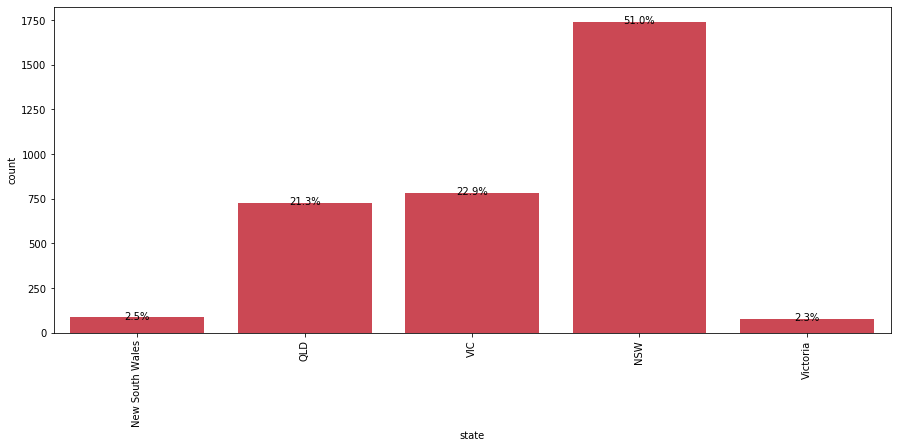

In [70]:
# create the plot
base_color=sns.color_palette(palette="rocket")[3]
plt.figure(figsize=(15,6))
sns.countplot(data = Final_dataset, x = 'state', color = base_color)

# add annotations
n_points = Final_dataset.shape[0]
cat_counts = Final_dataset['state'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center')
    plt.xticks(rotation=90)

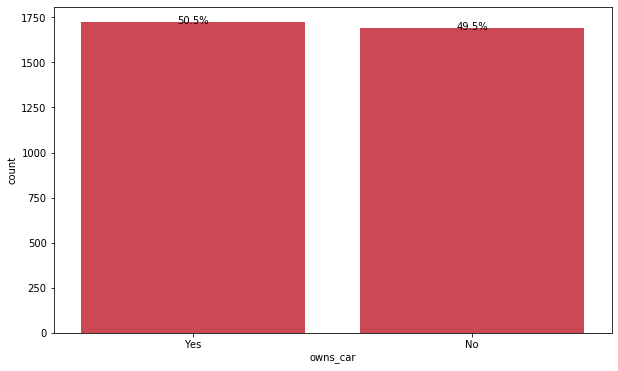

In [71]:
# create the plot
base_color=sns.color_palette(palette="rocket")[3]
plt.figure(figsize=(10,6))
sns.countplot(data = Final_dataset, x = 'owns_car', color = base_color)

# add annotations
n_points = Final_dataset.shape[0]
cat_counts = Final_dataset['owns_car'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center')

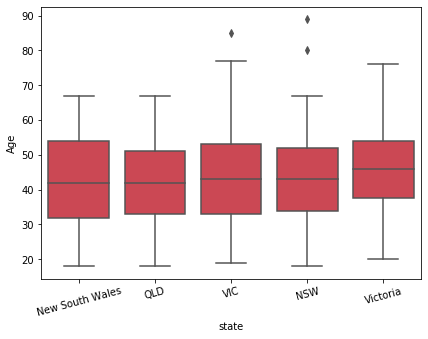

In [72]:
base_color=sns.color_palette(palette="rocket")[3]
plt.figure(figsize=(15,5))

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = Final_dataset, x = 'state', y = 'Age', color = base_color)
#plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation=15);

(array([0, 1]), <a list of 2 Text xticklabel objects>)

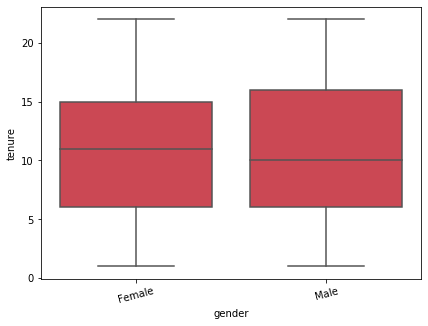

In [73]:
base_color=sns.color_palette(palette="rocket")[3]
plt.figure(figsize=(15,5))

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = Final_dataset, x = 'gender', y = 'tenure', color = base_color)
#plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation=15)

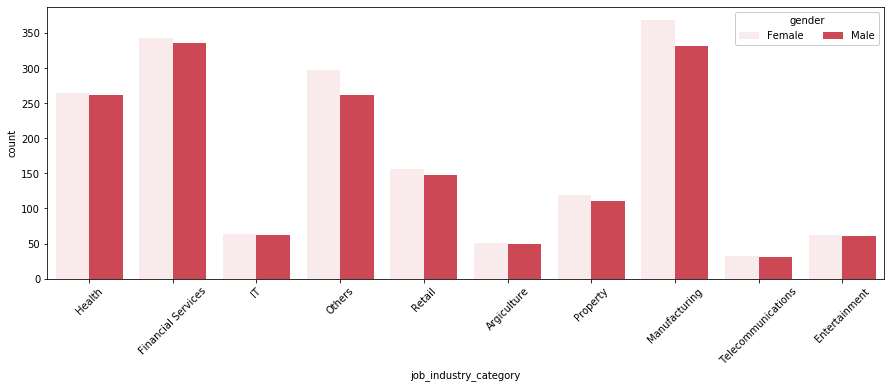

In [74]:
base_color=sns.color_palette(palette="rocket")[3]
plt.figure(figsize=(15,5))
ax = sns.countplot(data = Final_dataset, x = 'job_industry_category', hue = 'gender',color=base_color)
ax.legend(loc = 0, ncol = 2, framealpha = 1, title = 'gender')
plt.xticks(rotation=45);

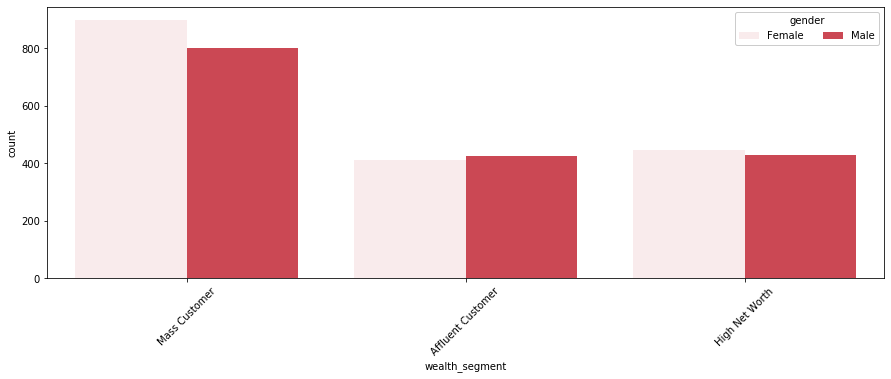

In [75]:
base_color=sns.color_palette(palette="rocket")[3]
plt.figure(figsize=(15,5))
ax = sns.countplot(data = Final_dataset, x = 'wealth_segment', hue = 'gender',color=base_color)
ax.legend(loc = 0, ncol = 2, framealpha = 1, title = 'gender')
plt.xticks(rotation=45);

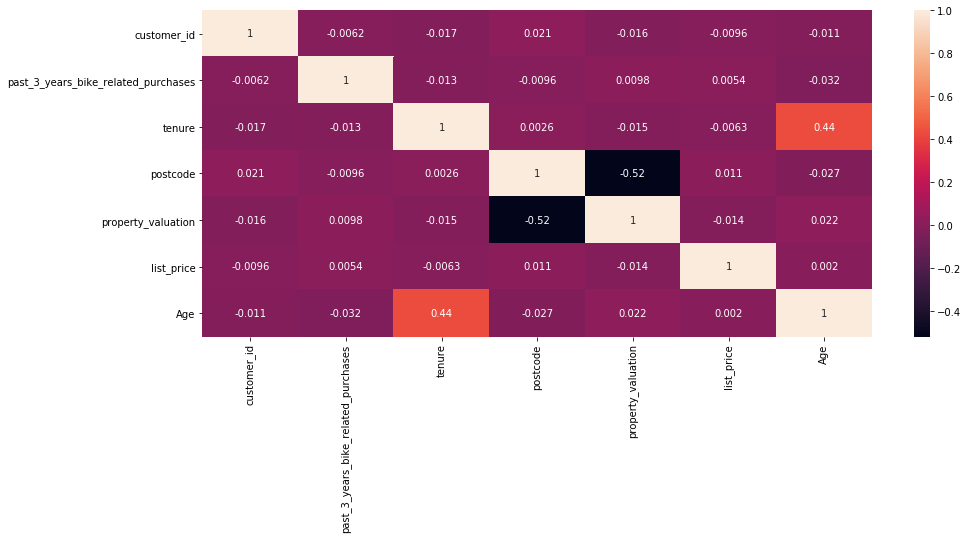

In [76]:
plt.figure(figsize=(15,6))
sns.heatmap(Final_dataset.corr(),xticklabels=Final_dataset.corr().columns.values,
           yticklabels=Final_dataset.corr().columns.values,annot=True);
plt.xticks(rotation=90);

## Finding the optimal number of clusters

In [77]:
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [78]:
Final_dataset.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,list_price,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,9084.45,67
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,4149.07,40
2,4,Talbot,Others,Male,33,1961-10-03,Others,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,1047.72,59
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Others,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4,5903.20,43
4,6,Curr,Duckhouse,Male,35,1966-09-16,Others,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,5931.69,54
